# Analyze TF-iDFs to find the gap

See online at https://mica5.github.io/Investigate+the+Gap.html

In [24]:
import os
from contextlib import contextmanager

from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
@contextmanager
def temporary_unlimited_row_limit():
    max_rows = pd.options.display.max_rows
    pd.options.display.max_rows = -1
    yield
    pd.options.display.max_rows = max_rows

# Gap Visualizations

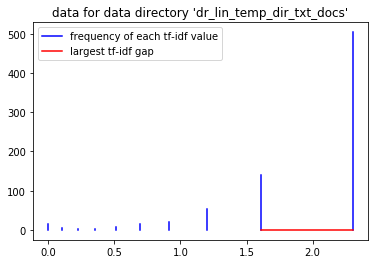

found keywords:
creativ, high-qual, activ, strateg, impress, vollendorf, tall, lisa, need, enthusiasm, artssan, redwood, lifelong, long, extens, economi, h, award, learner, respect, bay, across, undergird, thinker, newsletterw, columbia, humanities-art, beauti, station, numer, air, edusubscrib, quest, radio, area, equiti, formerli, compris, second, locationwashington, soul, broadcast, win, audienc, hands-on, sitesan, travel, beach, share, nsf, critic, foundat, master, thought, intellectu, inquiri, wide, re-accredit, promot, academ, engin, challeng, independ, bachelor, review, western, rang, wasc, west, rich, transform, remark, they, succeed, accredit, hallmark, worksan, less, forb, luca, worldwid, futur, firm, tower, stroll, background, valleywith, moment, age, aacsb, averag, fact, job, journey, power, over, admiss, wish, per, cours, ste, eduth, advanc, opportun, lighten, hour, moreth, innov, cie, start, up, english, scholar, serv, load, abroad, onli, geo, ip, remot, choic, class, form

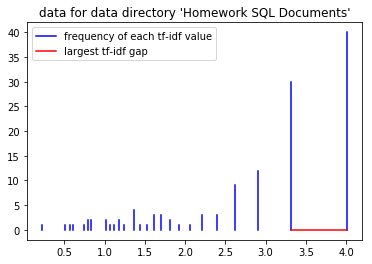

found keywords:
find, highest, set, -, updat, manag, dlocat, dept, mgrssn, he, she, is, like, distinct, it, depar, as, born, doe, assum, everi, can, note, replac, remov, within, should, chronolog, birthday, max, e, count, use, less, delet, decreas, supervis, are, under, retriev, 

In [6]:
from parallel_tokenizer import run_tokenize
data_dirs = [
    "./documents/dr_lin_temp_dir_txt_docs",
    "./documents/Homework SQL Documents",
]
all_results = list()
for data_dir in data_dirs:
    directory = os.path.basename(data_dir)
    results = run_tokenize([data_dir], do_print=False)
    all_results.append(results)

    tfidfs = pd.Series([v[-1] for v in results]).sort_values()

    unique_tfidfs = pd.Series(tfidfs.unique())

    tfidf_gap_index = unique_tfidfs.diff().idxmax()-1
    tfidf_gap_left = unique_tfidfs[tfidf_gap_index]
    tfidf_gap_right = unique_tfidfs[tfidf_gap_index+1]

    plt.title("data for data directory '{}'".format(directory))

    tfidfvcs = tfidfs.value_counts()
    maxcount = 0
    label = 'frequency of each tf-idf value'
    for tfidf, count in tfidfvcs.iteritems():
        maxcount = max(maxcount, count)
        plt.plot([tfidf, tfidf], [0, count], 'b', label=label)
        label = None

    offset = .1
    plt.plot([tfidf_gap_left, tfidf_gap_right], [0, 0], '-r', label='largest tf-idf gap')
    plt.legend()
    plt.show()

    print("found keywords:")
    for r in results:
        if r[-1] >= tfidf_gap_right:
            print(r[0], end=', ')

# TF-iDF Tables

In [10]:
df1 = pd.DataFrame(
    all_results[0],
    columns='word docid tfidf'.split()
)

In [20]:
df1.sort_values('tfidf')

,word,docid,tfidf
0,is,10,0.000000
1,one,10,0.000000
2,and,10,0.000000
3,jose,10,0.000000
4,the,10,0.000000
5,ca,10,0.000000
6,-,10,0.000000
7,state,10,0.000000
8,in,10,0.000000
9,to,10,0.000000


In [12]:
df2 = pd.DataFrame(
    all_results[1],
    columns='word docid tfidf'.split()
)

In [28]:
df2.sort_values('tfidf')

,word,docid,tfidf
0,employe,44,0.223144
1,from,33,0.510826
2,select,31,0.573346
3,where,30,0.606136
4,work,26,0.749237
5,in,25,0.788457
6,ssn,25,0.788457
8,on,24,0.829279
7,and,24,0.829279
9,name,20,1.011601
